In [1]:
import torch
import numpy as np

In [2]:
dtype = torch.float
device = torch.device('cpu')

In [3]:
N = 64
D_in = 20
H = 20

In [4]:
x = np.random.randn(N,D_in)

In [5]:
D = torch.utils.data.DataLoader(x, batch_size=12, shuffle=True)
print(D)

In [6]:
encoder = torch.nn.Sequential(
    torch.nn.Linear(D_in,H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H)
)

decoder = torch.nn.Sequential(
    torch.nn.Linear(H,H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_in)
)

In [7]:
loss_fn = torch.nn.MSELoss(reduction="mean")

In [8]:
LR = 1e-2
T  = 50
LAM = 100.0

In [9]:
opt = torch.optim.Adam(list(encoder.parameters())+\
                       list(decoder.parameters()),
                       lr=LR)

In [10]:
for t in range(T):
    for batch,sample in enumerate(D):
        encoded = encoder(sample.float())

        x_pred = decoder(encoded)

        loss = loss_fn(x_pred,sample.float())
        
        reg = torch.einsum("ni,nj->nij",encoded,encoded)
        reg = torch.mean(reg,dim=0)
        reg = (reg-torch.eye(H))**2
        reg = torch.mean(reg)
        
        loss += LAM*reg
        opt.zero_grad() #zero gradient, why? -> because gradients are
        #accumulated normally.

        loss.backward()

        opt.step()
    print(t,loss.item(),reg.item())

0 2.997260093688965 0.021765723824501038
1 3.3483939170837402 0.024322664365172386
2 2.8896408081054688 0.02119416743516922
3 3.873849391937256 0.03052641451358795
4 3.3723602294921875 0.02637358382344246
5 2.880920886993408 0.02110656350851059
6 2.7987120151519775 0.022479763254523277
7 3.204115629196167 0.02548287808895111
8 2.6613571643829346 0.022045902907848358
9 2.657231330871582 0.021219318732619286
10 2.6548678874969482 0.020975928753614426
11 2.8574624061584473 0.024477845057845116
12 3.2242789268493652 0.027055440470576286
13 2.6492207050323486 0.02218649908900261
14 2.735619306564331 0.022097816690802574
15 2.704864501953125 0.023330073803663254
16 2.694549798965454 0.022953396663069725
17 2.8699586391448975 0.025560293346643448
18 2.6179518699645996 0.0224610585719347
19 2.4205451011657715 0.02109850011765957
20 2.5254948139190674 0.022274767979979515
21 2.530794620513916 0.022453932091593742
22 2.7098817825317383 0.02447335049510002
23 2.524352788925171 0.02309945598244667

In [11]:
z = encoder(torch.from_numpy(x[0]).float())
o = decoder(z)
print(o)

tensor([ 0.3297, -0.5864,  0.0573, -0.7209,  0.4829, -0.2882,  0.3110,  0.5209,
        -1.7048, -1.6036,  1.0833,  1.0630,  0.7208, -1.4447,  0.3800, -0.7366,
         0.8787,  0.3891, -1.2528, -0.3505], grad_fn=<AddBackward0>)


In [12]:
x[0]

array([-0.21778317, -0.04093912,  0.57373434, -1.3274857 ,  0.77783195,
       -0.59828433,  1.0754353 ,  1.14441436, -1.78644188, -1.94612744,
        1.15840282,  1.53379232,  0.2878578 , -1.60499083,  1.50349799,
       -0.56402271,  0.43506824,  0.85252704, -1.25739111, -0.72983643])

In [13]:
Z = encoder(torch.from_numpy(x).float()).data.numpy()

In [14]:
print(Z.shape)

(64, 20)


In [15]:
B = np.zeros((H,H))
for i in range(N):
    z = Z[i][:,np.newaxis]
    B += z.dot(z.T)

In [16]:
print(B/N)

[[ 1.84470570e-01 -4.58733536e-02  2.67866171e-02  4.07292560e-02
  -4.60583107e-02 -5.07813342e-02  5.97539931e-02 -8.72036500e-03
   2.87798411e-02 -3.39311613e-02 -8.29184849e-02 -7.29231424e-02
   3.49098759e-02  2.34796971e-02  2.29896333e-02  2.83099880e-02
  -2.77269259e-02 -4.64833443e-02  1.90675624e-02  2.37613341e-02]
 [-4.58733536e-02  2.60925445e-01 -2.04582045e-02  3.45609646e-02
  -5.12331839e-03  1.81011516e-03 -4.40852036e-02  8.64528105e-03
  -1.39075752e-02 -3.52431729e-02  8.98935231e-03  2.24961477e-03
  -1.09665567e-02  2.17634112e-02  1.45687530e-01 -7.47059421e-02
  -9.88711991e-02 -2.30931301e-02 -2.10959655e-02  1.76207137e-02]
 [ 2.67866171e-02 -2.04582045e-02  2.76113053e-01  4.59568050e-02
  -1.98397931e-02 -1.82146450e-02 -4.55757863e-02  2.31560516e-02
  -7.09604697e-02  8.86669169e-02  4.41926061e-02  4.91909239e-03
   1.01183615e-01 -1.32313973e-02 -1.44215391e-01  8.05729236e-02
  -7.89175921e-02 -4.12045378e-02 -2.30274169e-03  4.08944249e-02]
 [ 4.07

In [17]:
import matplotlib.pyplot as plt

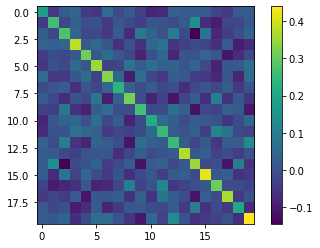

In [18]:
plt.figure()
plt.imshow(B/N)
plt.colorbar()
plt.show()